In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
import numpy as np

In [4]:
savename = "Maxwell_SDF"
filehandler = open("/Users/kartik/Dropbox/ips3/"+savename, 'rb')
df = pickle.load(filehandler)
print("File saved and loaded successfully.")

File saved and loaded successfully.


In [5]:
duration = 300 # This only affects the SDF time axis

Text(0.5, 0, 'Time (s)')

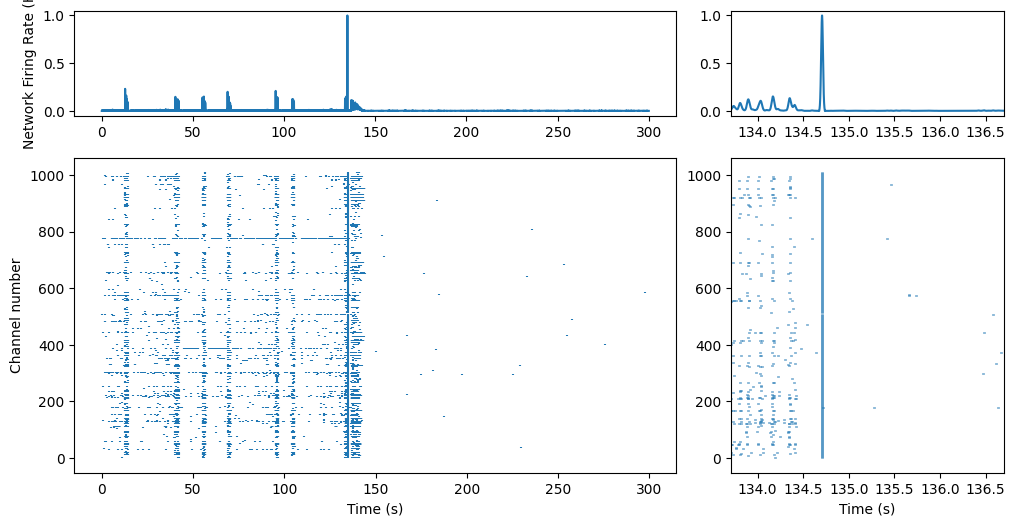

In [11]:
'''
Visualize raster plot and spike density function overtop
'''
# Let's just look at one of the files
i = 1

raster = df.iloc[i]["raster"]
sdf = df.iloc[i]["ds_network_sdf"]

time = np.arange(0, duration, duration/len(sdf)) # duration/len(sdf) calculates the 1/sampling frequency

fig = plt.figure(figsize=(12,6))
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 2, 2], height_ratios=[1, 3]) 
ax0 = fig.add_subplot(gs[0, :2]) 
ax1 = fig.add_subplot(gs[1, :2])

ax0.plot(time, sdf)
ax0.set_ylabel("Network Firing Rate (Hz)")

ax1.eventplot(raster)
ax1.set_ylabel("Channel number")
ax1.set_xlabel("Time (s)")


'''
Visualize the most active network burst based on the maximum peak of the SDF
This is a bad way to do it because it doesn't give you flexibility in terms of
when the network burst starts and ends, but I didn't have time to adaptively determine
thresholds.
'''
max_burst_ind = np.argmax(sdf)
max_burst_time = (max_burst_ind*(duration/len(sdf)))

ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 2]) 

ax2.plot(time,sdf)
ax2.set_xlim([max_burst_time-1, max_burst_time+2])

ax3.eventplot(raster, linewidths=2)
ax3.set_xlim([max_burst_time-1, max_burst_time+2])
ax3.set_xlabel("Time (s)")



Text(0.5, 0, 'Time (s)')